<a href="https://colab.research.google.com/github/Harshkotkar/Deep-Learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


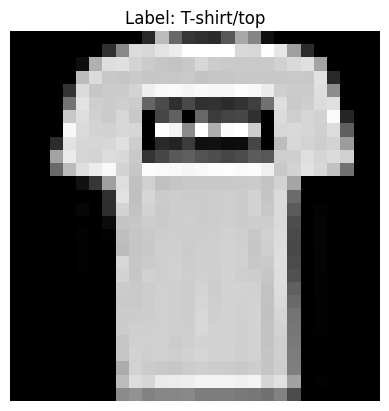

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {class_names[y_train[1]]}")
plt.axis('off')
plt.show()


In [33]:
x_train=x_train/255.0
x_test=x_test/255.0


In [35]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [5]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [6]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(58,58,1)),
    MaxPooling2D(2,2),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
history=model.fit(x_train,y_train_cat,
                  epochs=10,
                  validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7436 - loss: 0.6865 - val_accuracy: 0.8739 - val_loss: 0.3463
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3381 - val_accuracy: 0.8927 - val_loss: 0.2990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8982 - loss: 0.2769 - val_accuracy: 0.9000 - val_loss: 0.2702
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9091 - loss: 0.2494 - val_accuracy: 0.8963 - val_loss: 0.2723
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9183 - loss: 0.2195 - val_accuracy: 0.9049 - val_loss: 0.2664
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9256 - loss: 0.1969 - val_accuracy: 0.9097 - val_loss: 0.2538
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9291 - loss: 0.1851 - val_accuracy: 0.9082 - val_loss: 0.2532
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9346 - loss: 0.1732 -

In [18]:
loss, accuracy = model.evaluate(x_test, y_test_cat)

print('loss:',round(loss,2))
print('accuracy:',round(accuracy,2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9092 - loss: 0.2821
loss: 0.27
accuracy: 0.91


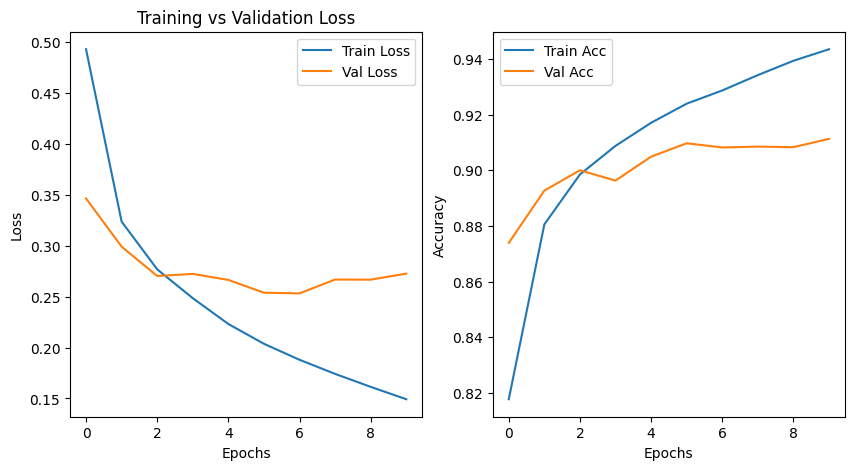

In [12]:
fig,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].plot(history.history['loss'],label='Train Loss')
axis[0].plot(history.history['val_loss'],label='Val Loss')
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend()
axis[0].set_title('Training vs Validation Loss')
axis[1].plot(history.history['accuracy'],label='Train Acc')
axis[1].plot(history.history['val_accuracy'],label='Val Acc')
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


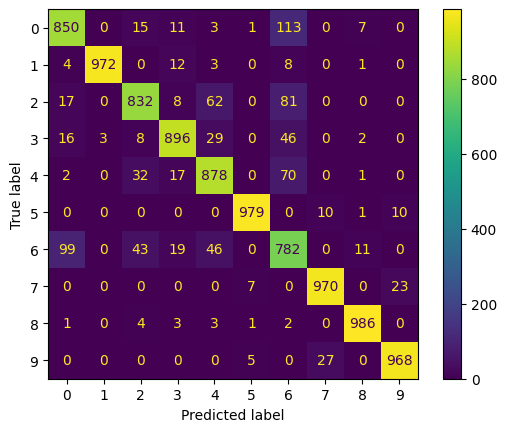

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [28]:
from sklearn.metrics import classification_report
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(y_true, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.89      0.83      0.86      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.71      0.78      0.74      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [24]:
from sklearn.metrics import roc_auc_score

# For multiclass, use one-hot labels
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC Score: {auc:.4f}")


AUC Score: 0.9942


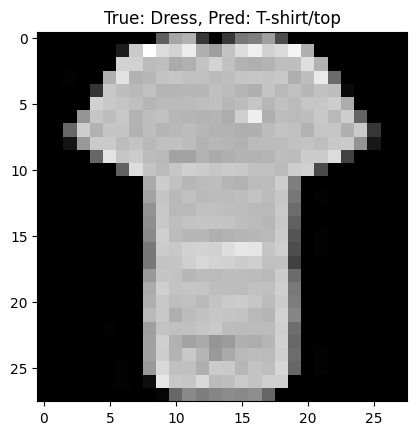

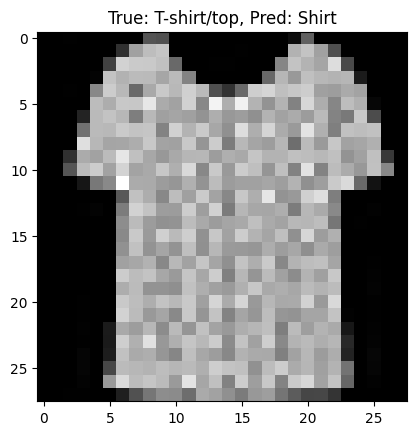

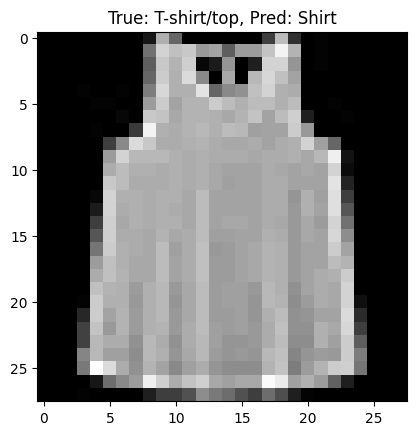

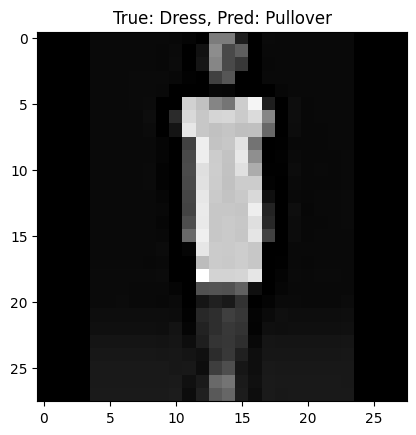

In [43]:
import matplotlib.pyplot as plt

misclassified = np.where(y_pred_classes != y_true)[0]
for i in misclassified[85:89]:
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_true[i]]}, Pred: {class_names[y_pred_classes[i]]}")
    plt.show()
